# Regression on Real Estate Dataset

### Objective

The main objective of the analysis is prediction of price per unit area variable given its features.

### Introduction

Real Estate price prediction is a dataset originally compiled for regression analysis, linear regression, multiple regression, and predictive tasks. The dataset consists of purchase date, age of property, location, house price of unit area, and distance to nearest station.

The dataset is obtained from <a href = "https://www.kaggle.com/quantbruce/real-estate-price-prediction">Kaggle</a> by <b>bruce.

In [1]:
#Loading libraries
import numpy as np  #Numerical Python library
import pandas as pd #Data Analysis library
import matplotlib.pyplot as plt  #Data Visualization library
import seaborn as sns #Data Visualization library

In [143]:
#Loading dataset
df = pd.read_csv("data/Real estate.csv")

In [144]:
#First five rows of dataset
print('First five rows of dataset')
df.head(5)

First five rows of dataset


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#Shape
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in dataset.')

There are 414 rows and 8 columns in dataset.


### Descriptive statistics

Descriptive statistics are those that summarizes the dataset and provide some quick insights.

In [5]:
#Summary

print('Summary table')
df.describe()

Summary table


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The mean price of unit area of house is $ 37.98K

### Data Cleaning

Data Cleaning is the process of converting the raw data into the form which aids in the process of analysis.

Data Cleaning methodology is as follows:-

1. Changing column names.
2. Handling missing values.
3. Feature Engineering
4. Dropping Irrelevent attributes.
5. Dropping Duplicate rows.

###### 1. Changing column names

In dataset, with each column name some additional information is also associated signifying its role in prediction analytics.
In this step of data cleaning column names are changed to appropriate ones.

In [145]:
#Changing column names
col = ['No', 'Transaction date', 'Age', 'Distance from nearest MRT station', 'No. of convenience stores', 'Latitude',\
       'Longitude', 'Price/Area']

df.columns = col

#After cleaning
df.head()

,No,Transaction date,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### 2. Handling missing values

Looking for missing values in the dataset

In [146]:
df.isnull().sum()

No                                   0
Transaction date                     0
Age                                  0
Distance from nearest MRT station    0
No. of convenience stores            0
Latitude                             0
Longitude                            0
Price/Area                           0
dtype: int64

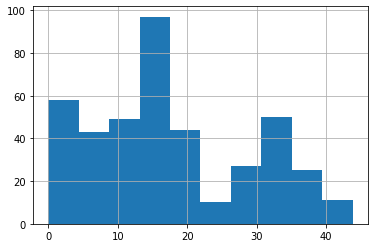

In [8]:
df['Age'].hist()

There are no missing values in dataset. But there are some observations in which Age is numbered as 0. Since Age of 0 doesn't make sense, we will remove those rows.

In [147]:
df_new = df[df['Age'] != 0].reset_index()
df_new.drop('index', axis = 1, inplace = True)
df_new.head()

,No,Transaction date,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### 3. Feature Engineering

Adding new feature Year in dataset

In [148]:
df_new['Year'] = df_new['Transaction date'].map(str).apply(lambda x : x.split('.')).apply(lambda x : x[0]).map(int)

In [11]:
df.head()

,No,Transaction date,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### 4. Dropping irrelevent attributes

Dropping irrelevent features like 'No' and 'Transaction date' which do not help in analysis.

In [149]:
df_new.drop(['No','Transaction date'], axis = 1, inplace = True)

In [13]:
#New dataset
df_new.head()

,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012


##### 5. Dropping Duplicate rows

Removing duplicate rows from dataset which have same Age, Distance from nearest MRT station, No. of convenience stores and Year.

In [150]:
df_new = df_new[df_new.duplicated(['Age', 'Distance from nearest MRT station', 'No. of convenience stores',\
                                   'Year']) == False]

In [151]:
df_new = df_new.reset_index(drop = True)

In [16]:
print(f'After removing duplicate rows there are {df_new.shape[0]} rows and {df_new.shape[1]} columns in dataset')

After removing duplicate rows there are 364 rows and 7 columns in dataset


### Exploratory Data Analysis

In [152]:
#First five rows of datset
print('First five rows of dataset')
df_new.head()

First five rows of dataset


,Age,Distance from nearest MRT station,No. of convenience stores,Latitude,Longitude,Price/Area,Year
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013
3,5.0,390.56840,5,24.97937,121.54245,43.1,2012
4,7.1,2175.03000,3,24.96305,121.51254,32.1,2012


Distribution of features


Text(0.5, 0.98, 'Distribution of Features')

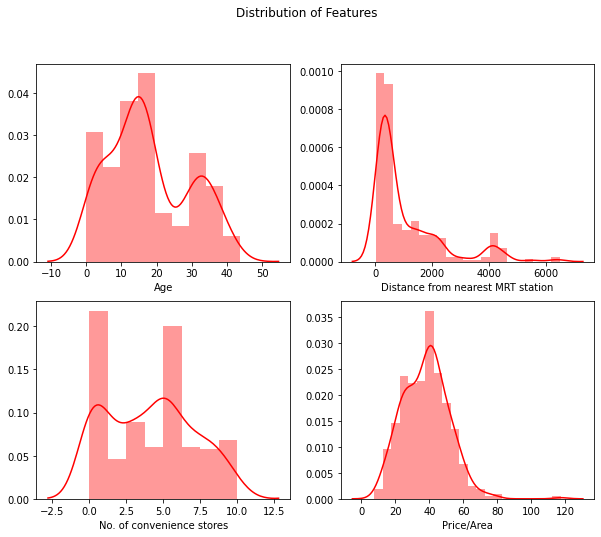

In [269]:
print('Distribution of features')
#Distribution plot of features
fig, axes = plt.subplots(2, 2, figsize = (10, 8))

ax = sns.distplot(df['Age'], ax = axes[0][0], color = 'red')
ax.set_xlabel('Age')

ax = sns.distplot(df['Distance from nearest MRT station'], ax = axes[0][1], color = 'red')
ax.set_xlabel('Distance from nearest MRT station')

ax = sns.distplot(df['No. of convenience stores'], ax = axes[1][0], color = 'red')
ax.set_xlabel('No. of convenience stores')

ax = sns.distplot(df['Price/Area'], ax = axes[1][1], color = 'red')
ax.set_xlabel('Price/Area')

plt.suptitle('Distribution of Features')

The distribution of age shows that in dataset the observations having Age between 20 to 30 is quite less. The distribution of Distance from nearest MRT station is skewed. The distribution of No. of convenient stores and Price / Area is quite normal.

Average price of unit Area for houses


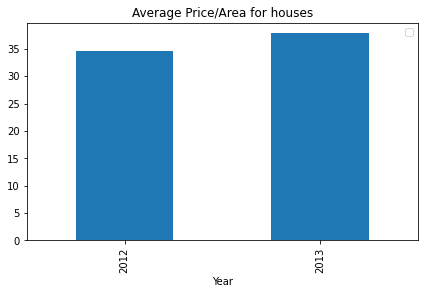

In [271]:
print('Average price of unit Area for houses')

df_bar = df_new[['Price/Area', 'Year']].groupby('Year').mean()
df_bar.plot(kind = 'bar', figsize = (7, 4))
plt.title('Average Price/Area for houses')
plt.legend([])

The above plot shows that the average price of unit area of the property has got increased in year 2013 from year 2012.

In [154]:
#Grouping dataframe by Latitude, longitude and Year
df_l = df_new[['Latitude', 'Longitude', 'Price/Area', 'Year']].groupby(['Latitude', 'Longitude', 'Year']).mean()
df_l.reset_index(inplace = True)

In [155]:
#Top 5 Positions in 2012 having largest Price/Area

print("Top 5 Positions having largest Price/Area in year 2012")
print(df_l[df_l['Year'] == 2012].sort_values(by = 'Price/Area', ascending = False).head().reset_index(drop = True))

print()

#Top 5 Positions in 2013 having largest Price/Area

print("Top 5 Positions having largest Price/Area in year 2013")
print(df_l[df_l['Year'] == 2013].sort_values(by = 'Price/Area', ascending = False).head().reset_index(drop = True))

Top 5 Positions having largest Price/Area in year 2012
   Latitude  Longitude  Year  Price/Area
0  24.95836  121.53756  2012        57.8
1  24.97528  121.54541  2012        57.4
2  24.98085  121.54391  2012        56.2
3  24.98419  121.54243  2012        55.1
4  24.98343  121.53762  2012        54.4

Top 5 Positions having largest Price/Area in year 2013
   Latitude  Longitude  Year  Price/Area
0  24.97460  121.53046  2013       117.5
1  24.97703  121.54265  2013        78.3
2  24.97071  121.54069  2013        78.0
3  24.96756  121.54230  2013        67.7
4  24.97345  121.54093  2013        63.3


Both years do not intersect at any Location. In 2012 Location having Latitude and Longitude (24.95836, 121.53756) is having highest Price/Area. In 2013 Location having Latitude and Longitude (24.97460, 121.53046) is having highest Price/Area.

In [156]:
#Bottom 5 Positions in 2012 having smallest Price/Area

print("Bottom 5 Positions having smallest Price/Area in year 2012")
print(df_l[df_l['Year'] == 2012].sort_values(by = 'Price/Area', ascending = False).tail().reset_index(drop = True))

print()

#Top 5 Positions in 2013 having largest Price/Area

print("Bottom 5 Positions having smallest Price/Area in year 2013")
print(df_l[df_l['Year'] == 2013].sort_values(by = 'Price/Area', ascending = False).tail().reset_index(drop = True))

Bottom 5 Positions having smallest Price/Area in year 2012
   Latitude  Longitude  Year  Price/Area
0  24.94297  121.50342  2012        15.0
1  24.94235  121.50357  2012        14.7
2  24.94960  121.53018  2012        13.8
3  24.94968  121.53009  2012        13.7
4  24.94925  121.49542  2012        13.2

Bottom 5 Positions having smallest Price/Area in year 2013
   Latitude  Longitude  Year  Price/Area
0  24.93885  121.50383  2013        13.0
1  24.94935  121.53046  2013        12.8
2  24.94375  121.47883  2013        12.2
3  24.95719  121.47353  2013        11.2
4  24.96172  121.53812  2013         7.6


Both years do not intersect at any Location. In 2012 Location having Latitude and Longitude (24.94925, 121.49542) is having smallest Price/Area. In 2013 Location having Latitude and Longitude (24.96172, 121.53812) is having smallest Price/Area.

#### Relationship between Distance from nearest MRT station and Average Price/Area

Creating new feature Range that represents the distance of nearest MRT station in steps of 100.

In [157]:
#Range represents the range in 100m within which property has nearest MRT station
df_new['Range'] = ((df_new['Distance from nearest MRT station'] + 50)/100).round() * 100

Text(0.5, 1.0, 'Distribution of Price according to range(metres)')

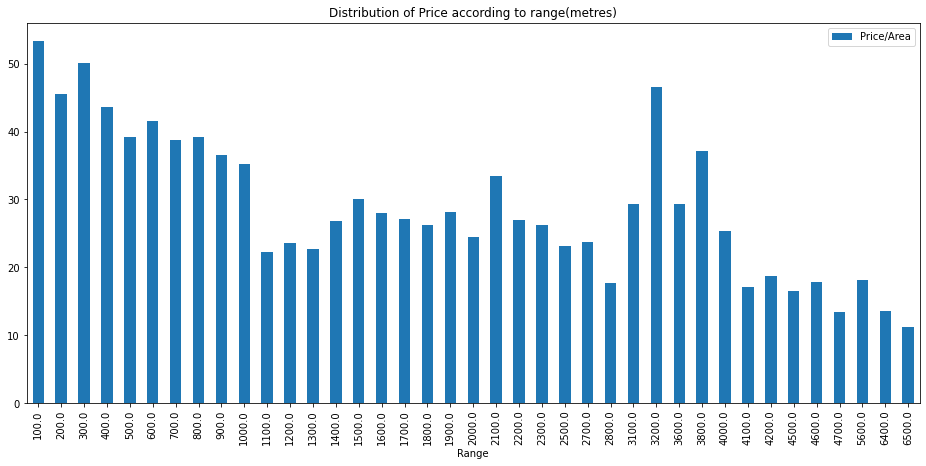

In [272]:
#Grouping observations according to range and finding mean Price/Area
df_m = df_new[['Range', 'Price/Area']].groupby('Range').mean()

#Plotting bar graph
df_m.plot(kind = 'bar', figsize =(16,7))
plt.title('Distribution of Price according to range(metres)')

From the above plot it can be inferred that with every 100m increase in distance to nearest MRT station Price/Value decreases. But there are also some special cases where average Price/Value is also large for larger distance like for 3100m to 4100m.

### Modelling

#### Determining Normality of Target Variable

###### 1. Visually

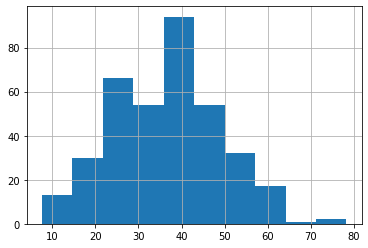

In [35]:
df_new['Price/Area'].hist()

It does look normal.

###### 2. Statistical Test

In [36]:
from scipy.stats.mstats import normaltest

normaltest(df_new['Price/Area'])

NormaltestResult(statistic=2.5108032516775682, pvalue=0.2849613773865552)

The p-value is greater than 0.05 so we fail to reject the null hypothesis that it is normal. So, target variable is normal.

### Testing Regression

In [162]:
#Importing libraries
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn.model_selection import GridSearchCV, cross_val_predict, KFold
from sklearn.pipeline import Pipeline

In [333]:
#Storing X
X = df_new.drop(['Price/Area', 'Latitude', 'Longitude', 'Range'], axis = 1)
#Storing y
y = df_new['Price/Area']

#### Baseline: Linear Regression

In [334]:
#Using KFold for using cross validation
kf = KFold(shuffle = True, random_state = 42, n_splits = 3)

In [336]:
#Using cross validation to find R2 score

scores = []

lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index,:],
                                        X.iloc[test_index, :],
                                        y[train_index],
                                        y[test_index])
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
    
print('R2 score for Baseline Linear Regression is ',np.mean(scores))

R2 score for Baseline Linear Regression is  0.524339082629021


#### Polynomial Regression(Degree = 2)

In [337]:
#Instantiating polynomial regression object
pr = PolynomialFeatures(degree = 2)

scores = []

lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index,:],
                                        X.iloc[test_index, :],
                                        y[train_index],
                                        y[test_index])
    
    pr.fit(X_train)
    X_train_pr = pr.transform(X_train)
    X_test_pr = pr.transform(X_test)
    lr.fit(X_train_pr, y_train)
    scores.append(lr.score(X_test_pr, y_test))
    
print('R2 score for Polynomial Regression of degree 2 is', np.mean(scores))

R2 score for Polynomial Regression of degree 2 is 0.5902648469495535


#### Polynomial Regression(Degree = 3)

In [338]:
#Instantiating polynomial regression object
pr = PolynomialFeatures(degree = 3)

scores = []

lr = LinearRegression()

for train_index, test_index in kf.split(X):
    X_train, X_test, y_train, y_test = (X.iloc[train_index,:],
                                        X.iloc[test_index, :],
                                        y[train_index],
                                        y[test_index])
    
    pr.fit(X_train)
    X_train_pr = pr.transform(X_train)
    X_test_pr = pr.transform(X_test)
    lr.fit(X_train_pr, y_train)
    scores.append(lr.score(X_test_pr, y_test))
    
print('R2 score for Polynomial Regression of degree 3 is', np.mean(scores))

R2 score for Polynomial Regression of degree 3 is 0.37798514715488524


Since R2 score of model with polynomial features with degree 2 is greater, we will tune it to achive higher accuracy.

#### Lasso Regression

In [339]:
#Instantiating polynomial regression object
pr = PolynomialFeatures(degree = 2, include_bias = False)

scores = []

alphas = np.geomspace(0.001, 10, 5)

for alpha in alphas:
    lasso = Lasso(alpha = alpha, max_iter = 1000000)
    
    estimator = Pipeline([('PolynomialFeatures' ,pr),
                          ('scaler', StandardScaler()),
                          ('Lasso',lasso)])
    
    estimator.fit(X, y)
    predictions = cross_val_predict(estimator, X, y, cv = kf)
    scores.append(r2_score(y, predictions))

Text(0, 0.5, 'Score')

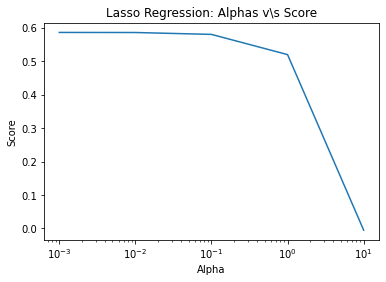

In [340]:
plt.semilogx(alphas,scores)
plt.title('Lasso Regression: Alphas v\s Score')
plt.xlabel('Alpha')
plt.ylabel('Score')

In [343]:
#Training on best estimator
best_estimator = Pipeline([('PolynomialFeatures' ,pr),
                          ('scaler', StandardScaler()),
                          ('Lasso',Lasso(alpha = 0.001, max_iter = 1000000))])

best_estimator.fit(X,y)
print('R2 score for Lasso Regression for alpha = 0.001 is ',best_estimator.score(X,y))

R2 score for Lasso Regression for alpha = 0.001 is  0.6059722423896299


The best model for prediction according to accuracy is Lasso Regression with hyperparameter alpha = 0.01. It gives a R2-score of about 0.60 i.e., 60% of the variability in outcome variable is explained by model.

In [344]:
#Plot of feature importance using Lasso coefficients
df_imp = pd.DataFrame(zip(best_estimator.named_steps['PolynomialFeatures'].get_feature_names(input_features = X.columns),\
                 best_estimator.named_steps['Lasso'].coef_), columns = ['Feature', 'Importance'])

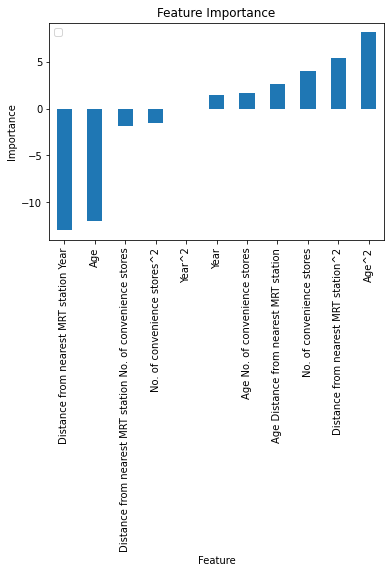

In [349]:
#Plotting df_imp
df_imp[df_imp['Importance'] != 0].set_index('Feature').sort_values(by = 'Importance').plot(kind = 'bar')
plt.title('Feature Importance')
plt.ylabel('Importance')
plt.legend([])

### Conclusions

The features which reduces the price per unit area of property are:
1. Interaction of Year and Distance from nearest MRT station.
2. Age.
3. Interaction of No. of convenience stores and Distance from nearest MRT station.
4. Square of No. of convenience stores

The features that increases the price per unit area of property are:
1. Square of Age.
2. Square of Distance of Nearest MRT station
3. No. of convenience stores.
4. Interaction of Age and Distance from nearest MRT station.
5. Interaction of No. of convenience stores and Age
6. Year

### Future Work

The analysis can be extended by analysing the price values at different latitudes and longitudes, through spatial analysis by collecting more data. Modelling can be extended by trying more linear regression models like Ridge Regression which prevents overfitting.

In [351]:

%%html
 <style>
    @media print { 
    div.input {
      display: none;
      padding: 0;
    }
    div.output_prompt {
      display: none;
      padding: 0;
    }
    div.text_cell_render {
      padding: 1pt;
    }
    div#notebook p,
    div#notebook,
    div#notebook li,
    p {
      font-size: 11pt;
      line-height: 135%;
      margin: 0;
    }
    .rendered_html h1,
    .rendered_html h1:first-child {
      font-size: 16pt;
      margin: 7pt 0;
    }
    .rendered_html h2,
    .rendered_html h2:first-child {
      font-size: 14pt;
      margin: 6pt 0;
    }
    .rendered_html h3,
    .rendered_html h3:first-child {
      font-size: 13pt;
      margin: 6pt 0;
    }
    div.output_subarea {
      padding: 0;
    }
  }
  @page {
      size: A4;
  }
  </style>